In [7]:
import torch
import torch.nn.functional as f
import numpy as np
import tltorch as tlt
import tensorly as ten
from lsr_tensor import *
from lsr_bcd_regression import *
from matplotlib import pyplot as plt
from datasets import synthesize_data

In [8]:
# Tests
shape, ranks, separation_rank = (64, 64), (8, 8), 2
x_stdev = 1
y_stdev = 0.05
sample_size = 2000
val_sample_size = int(sample_size * 0.1)

with torch.no_grad():
    true_lsr = LSR_tensor(shape, ranks, separation_rank)
    f.normalize(true_lsr.core_tensor, p=2, dim=0, out=true_lsr.core_tensor)
    true_lsr.core_tensor *= (5 / torch.sqrt(torch.sqrt(torch.prod(torch.tensor(ranks)))))
    
    dataset = synthesize_data(true_lsr, sample_size, shape, x_stdev, y_stdev)
    val_dataset = synthesize_data(true_lsr, val_sample_size, shape, x_stdev, y_stdev)

In [9]:
lsr_ten, diag_1 = lsr_bcd_regression(f.mse_loss, dataset, shape, ranks, separation_rank, lr=0.01, momentum=0.9,\
                                            step_epochs=1, max_iter=500, batch_size=None, threshold=1e-4, init_zero=False, ortho=True,\
                                            verbose=True, true_param=true_lsr.expand_to_tensor(), val_dataset=val_dataset)

Iteration 0 | Delta: 6.726150989532471, Last Batch Training Loss: 110.24258422851562
Iteration 10 | Delta: 0.3761328458786011, Last Batch Training Loss: 23.08614730834961
Iteration 20 | Delta: 0.17813102900981903, Last Batch Training Loss: 14.466182708740234
Iteration 30 | Delta: 0.1153152659535408, Last Batch Training Loss: 10.83878231048584
Iteration 40 | Delta: 0.08641013503074646, Last Batch Training Loss: 8.78663444519043
Iteration 50 | Delta: 0.07145459204912186, Last Batch Training Loss: 7.422988414764404
Iteration 60 | Delta: 0.06231334060430527, Last Batch Training Loss: 6.416472434997559
Iteration 70 | Delta: 0.05553429201245308, Last Batch Training Loss: 5.623951435089111
Iteration 80 | Delta: 0.04978923872113228, Last Batch Training Loss: 4.977675437927246
Iteration 90 | Delta: 0.04463667422533035, Last Batch Training Loss: 4.442419052124023
Iteration 100 | Delta: 0.039986878633499146, Last Batch Training Loss: 3.996532678604126
Iteration 110 | Delta: 0.0358528196811676, La

In [10]:
lsr_ten, diag_5 = lsr_bcd_regression(f.mse_loss, dataset, shape, ranks, separation_rank, lr=0.01, momentum=0.9,\
                                            step_epochs=5, max_iter=100, batch_size=None, threshold=1e-4, init_zero=False, ortho=True,\
                                            verbose=True, true_param=true_lsr.expand_to_tensor(), val_dataset=val_dataset)

Iteration 0 | Delta: 14.514588356018066, Last Batch Training Loss: 54.37708282470703
Iteration 2 | Delta: 3.618922710418701, Last Batch Training Loss: 12.532876968383789
Iteration 4 | Delta: 1.247373104095459, Last Batch Training Loss: 6.168356418609619
Iteration 6 | Delta: 0.7172408699989319, Last Batch Training Loss: 3.959712505340576
Iteration 8 | Delta: 0.4995507299900055, Last Batch Training Loss: 2.841813087463379
Iteration 10 | Delta: 0.4069804549217224, Last Batch Training Loss: 2.174377679824829
Iteration 12 | Delta: 0.34621623158454895, Last Batch Training Loss: 1.7321733236312866
Iteration 14 | Delta: 0.2907487154006958, Last Batch Training Loss: 1.42647385597229
Iteration 16 | Delta: 0.23931068181991577, Last Batch Training Loss: 1.213772177696228
Iteration 18 | Delta: 0.19733679294586182, Last Batch Training Loss: 1.0600180625915527
Iteration 20 | Delta: 0.16608428955078125, Last Batch Training Loss: 0.9410476088523865
Iteration 22 | Delta: 0.14292773604393005, Last Batch 

In [11]:
lsr_ten, diag_10 = lsr_bcd_regression(f.mse_loss, dataset, shape, ranks, separation_rank, lr=0.01, momentum=0.9,\
                                            step_epochs=10, max_iter=50, batch_size=None, threshold=1e-4, init_zero=False, ortho=True,\
                                            verbose=True, true_param=true_lsr.expand_to_tensor(), val_dataset=val_dataset)

Iteration 0 | Delta: 12.671506881713867, Last Batch Training Loss: 31.938352584838867
Iteration 1 | Delta: 5.899043560028076, Last Batch Training Loss: 11.856843948364258
Iteration 2 | Delta: 3.3221747875213623, Last Batch Training Loss: 5.362142086029053
Iteration 3 | Delta: 1.9715497493743896, Last Batch Training Loss: 2.9940407276153564
Iteration 4 | Delta: 1.2545380592346191, Last Batch Training Loss: 1.988269329071045
Iteration 5 | Delta: 0.8694203495979309, Last Batch Training Loss: 1.4557942152023315
Iteration 6 | Delta: 0.6453092098236084, Last Batch Training Loss: 1.1460586786270142
Iteration 7 | Delta: 0.4927663207054138, Last Batch Training Loss: 0.9480608105659485
Iteration 8 | Delta: 0.3978727161884308, Last Batch Training Loss: 0.8110995888710022
Iteration 9 | Delta: 0.33669787645339966, Last Batch Training Loss: 0.7086195349693298
Iteration 10 | Delta: 0.29394471645355225, Last Batch Training Loss: 0.6285613179206848
Iteration 11 | Delta: 0.2608218491077423, Last Batch T

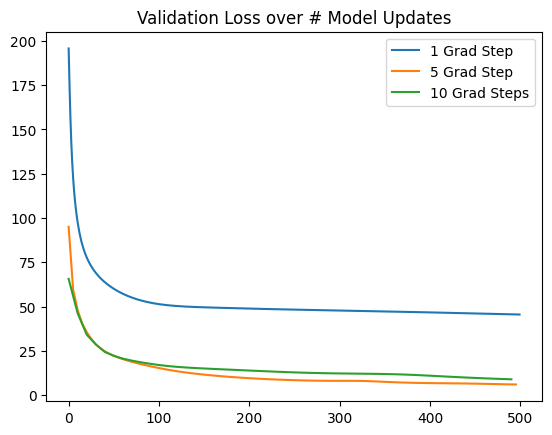

In [16]:
plt.plot(np.arange(len(diag_1["val_loss"])), diag_1["val_loss"], label="1 Grad Step")
plt.plot(np.arange(len(diag_5["val_loss"]))*5, diag_5["val_loss"], label="5 Grad Step")
plt.plot(np.arange(len(diag_10["val_loss"]))*10, diag_10["val_loss"], label="10 Grad Steps")
plt.title("Validation Loss over # of Model Updates")
plt.legend()
plt.show()

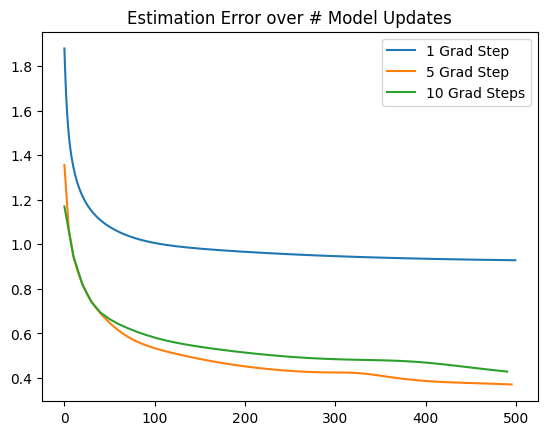

In [17]:
plt.plot(np.arange(len(diag_1["estimation_error"])), diag_1["estimation_error"], label="1 Grad Step")
plt.plot(np.arange(len(diag_5["estimation_error"]))*5, diag_5["estimation_error"], label="5 Grad Step")
plt.plot(np.arange(len(diag_10["estimation_error"]))*10, diag_10["estimation_error"], label="10 Grad Steps")
plt.title("Estimation Error over # of Model Updates")
plt.legend()
plt.show()